# 1: Import Libraries and Load Data


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

In [9]:
df = pd.read_csv('bank-additional-full.csv', sep=';')
df.sample(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
10484,36,services,married,high.school,unknown,no,no,telephone,jun,tue,...,2,999,0,nonexistent,1.4,94.465,-41.8,4.961,5228.1,no
34065,38,blue-collar,married,basic.9y,no,yes,no,cellular,may,wed,...,5,999,0,nonexistent,-1.8,92.893,-46.2,1.281,5099.1,yes
8955,48,management,married,university.degree,no,no,yes,telephone,jun,thu,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.866,5228.1,no
17838,60,retired,divorced,professional.course,no,no,no,cellular,jul,tue,...,4,999,0,nonexistent,1.4,93.918,-42.7,4.961,5228.1,no
11455,52,entrepreneur,married,high.school,no,yes,no,telephone,jun,fri,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no


# 2: Exploratory Data Analysis (EDA)


In [13]:
# Check for missing values
df.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

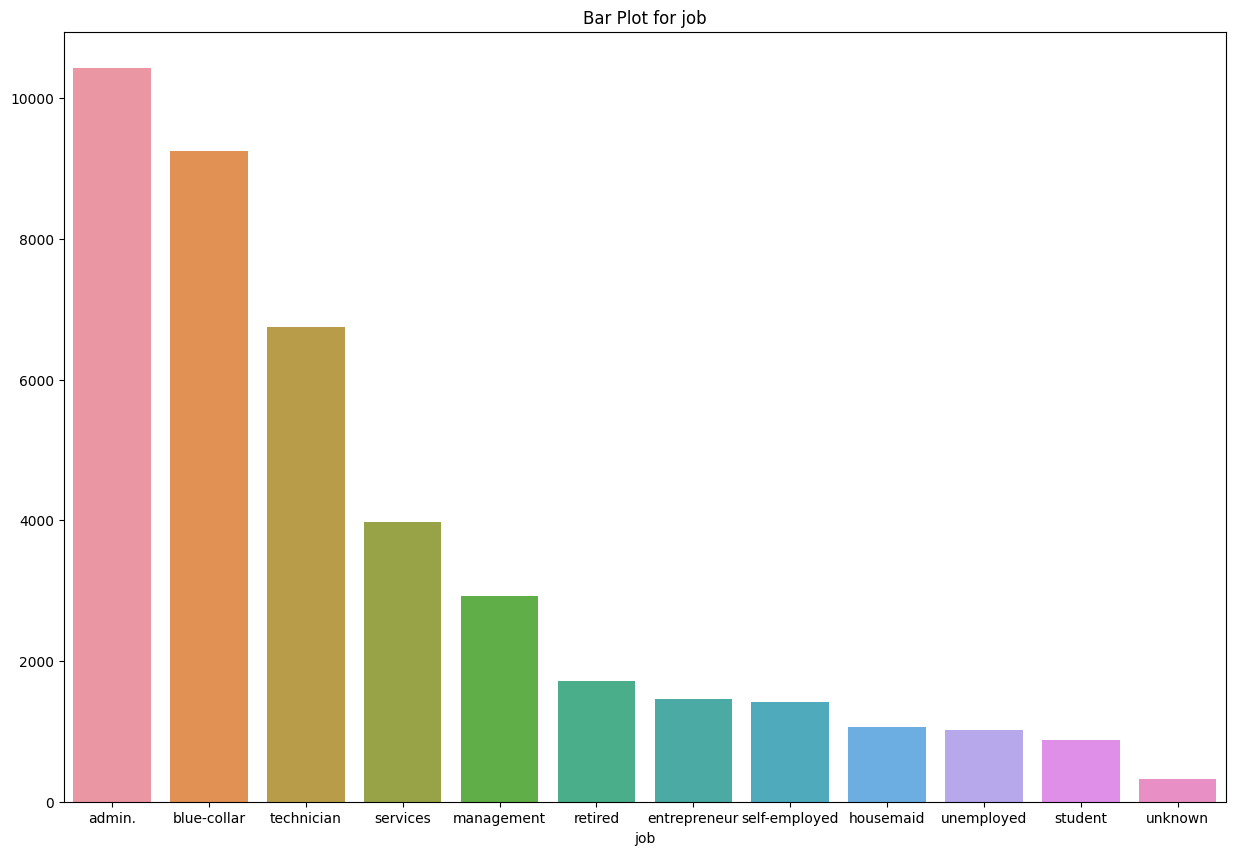

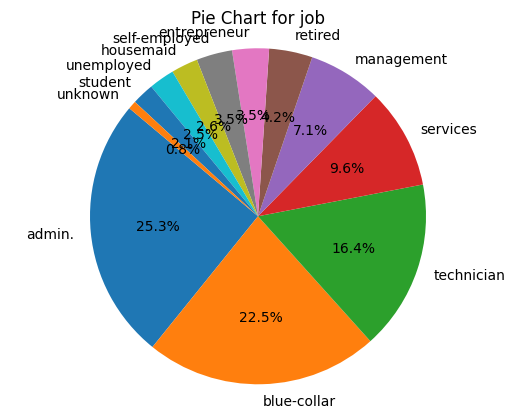

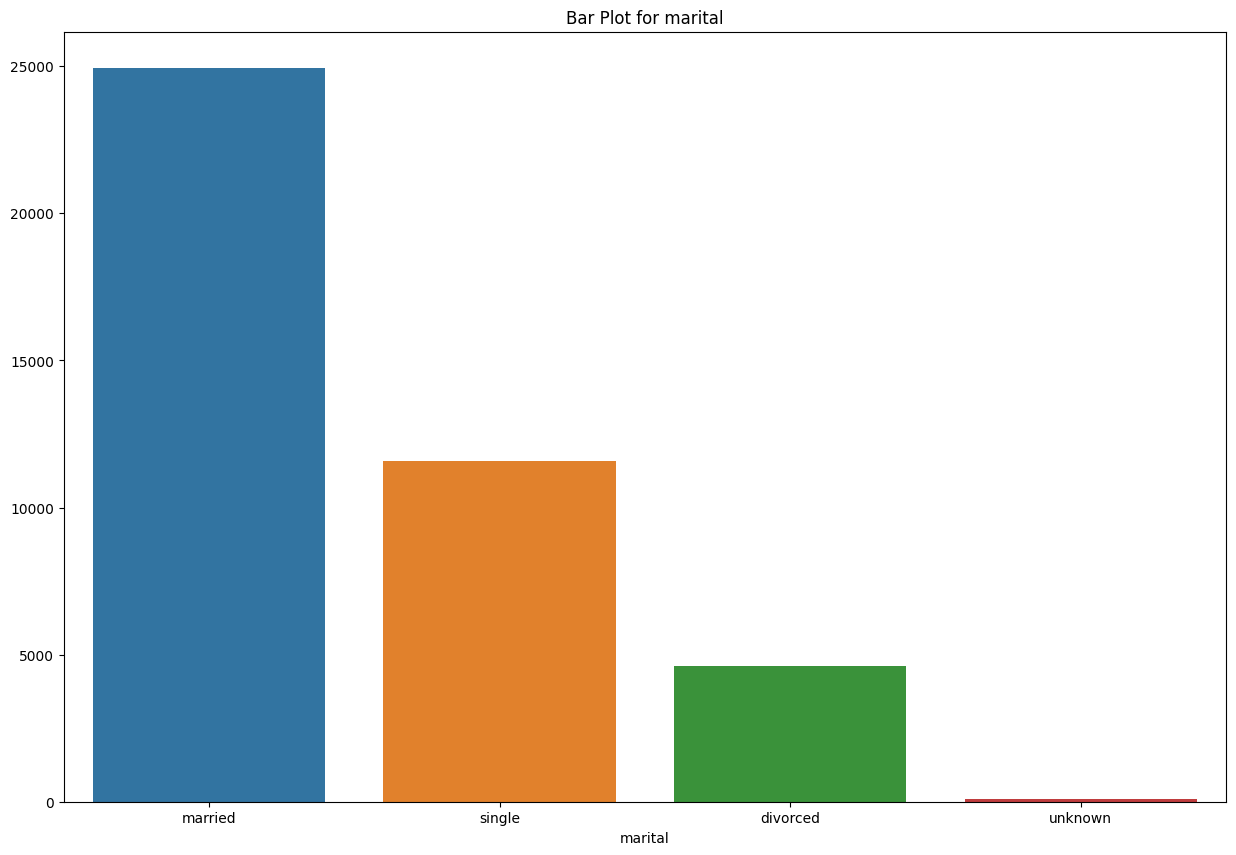

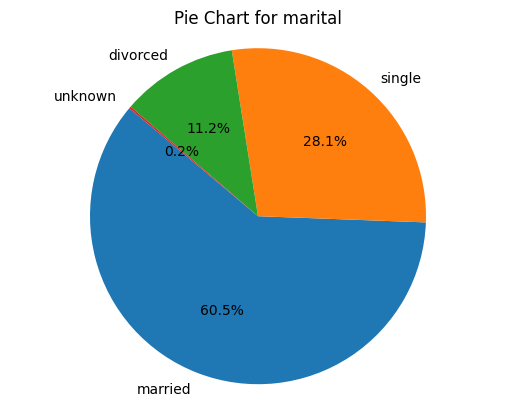

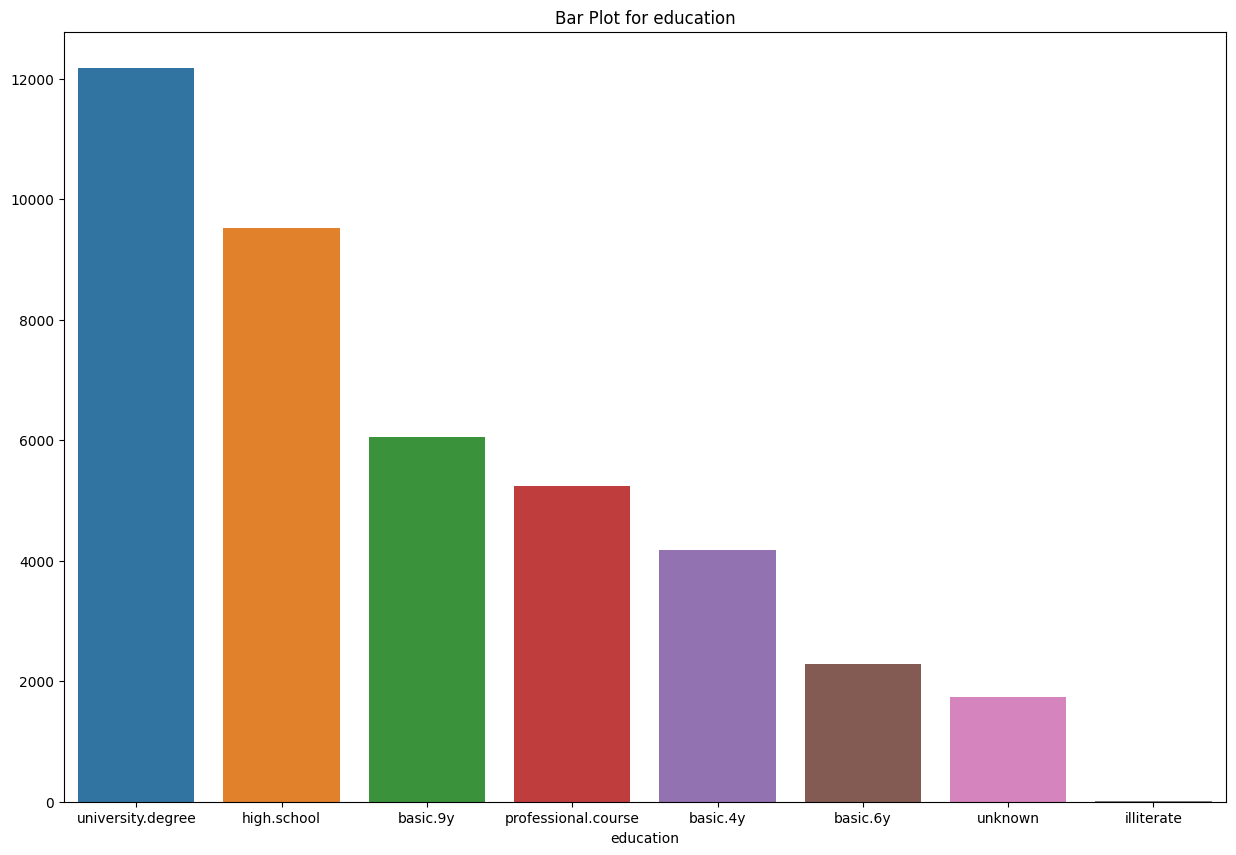

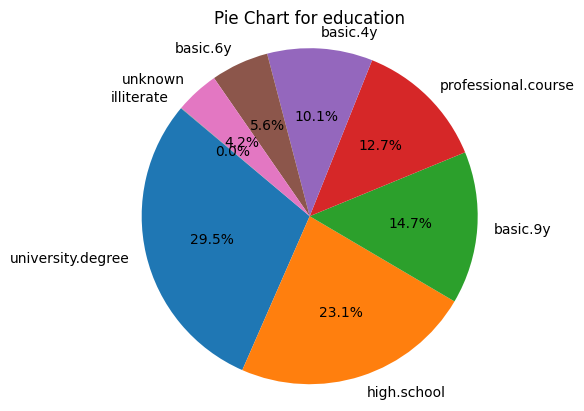

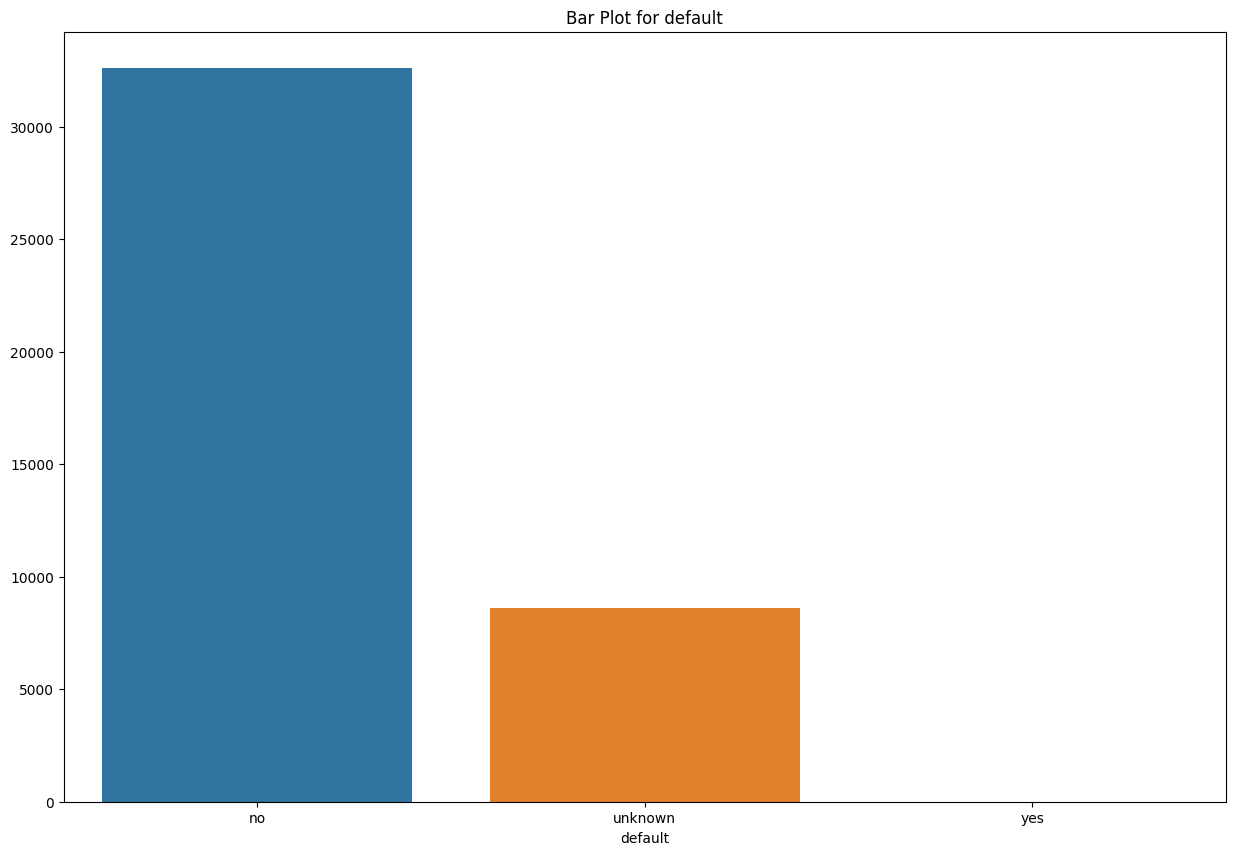

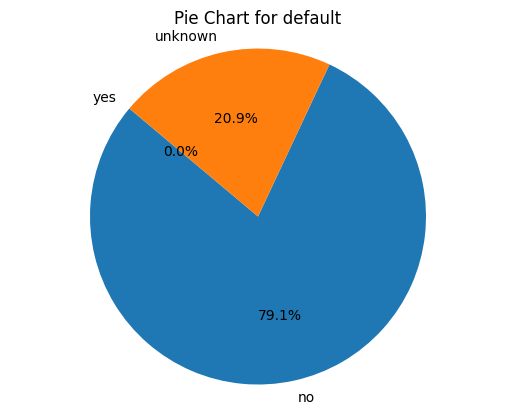

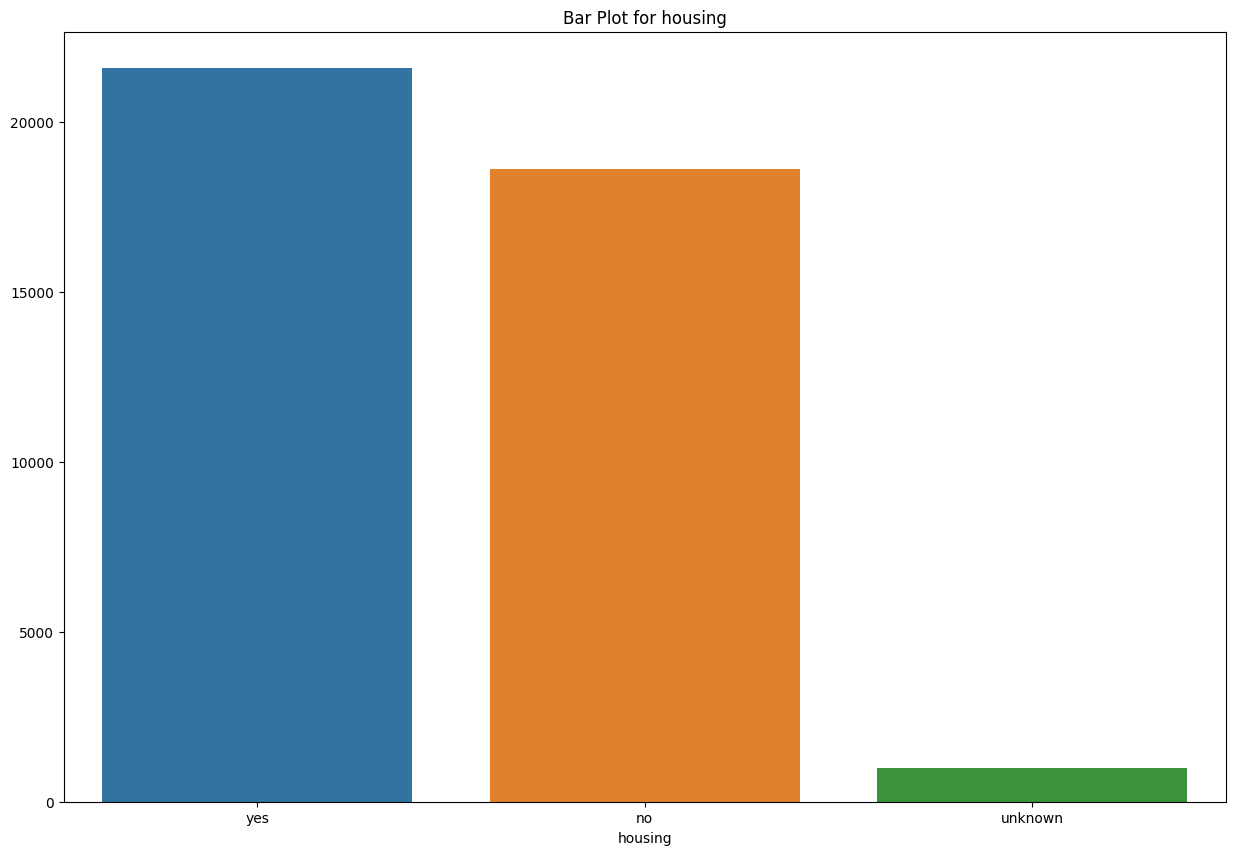

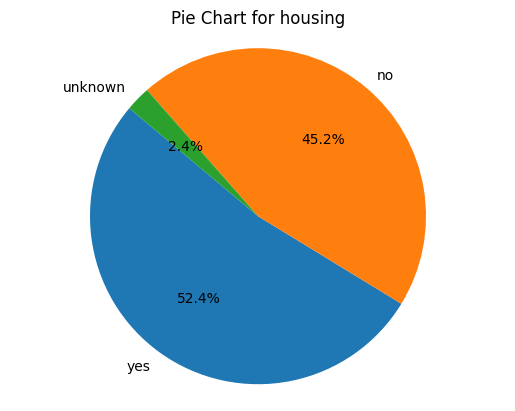

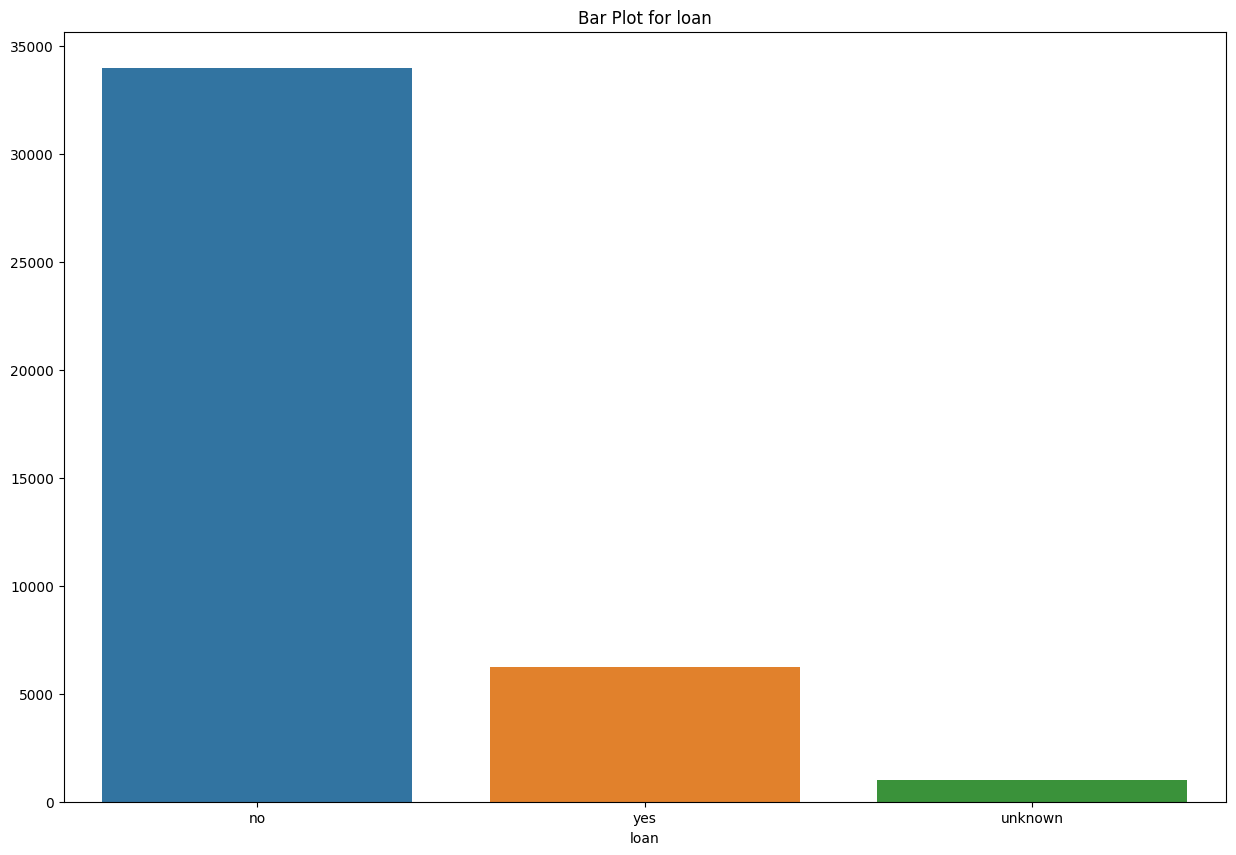

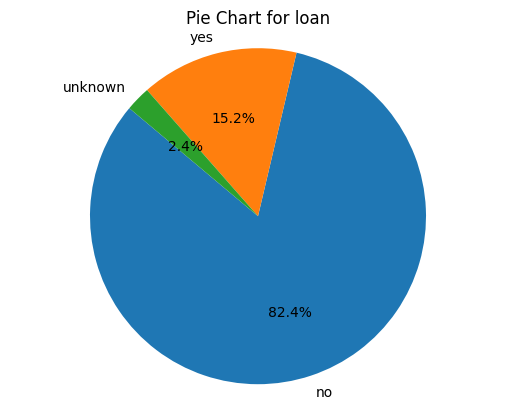

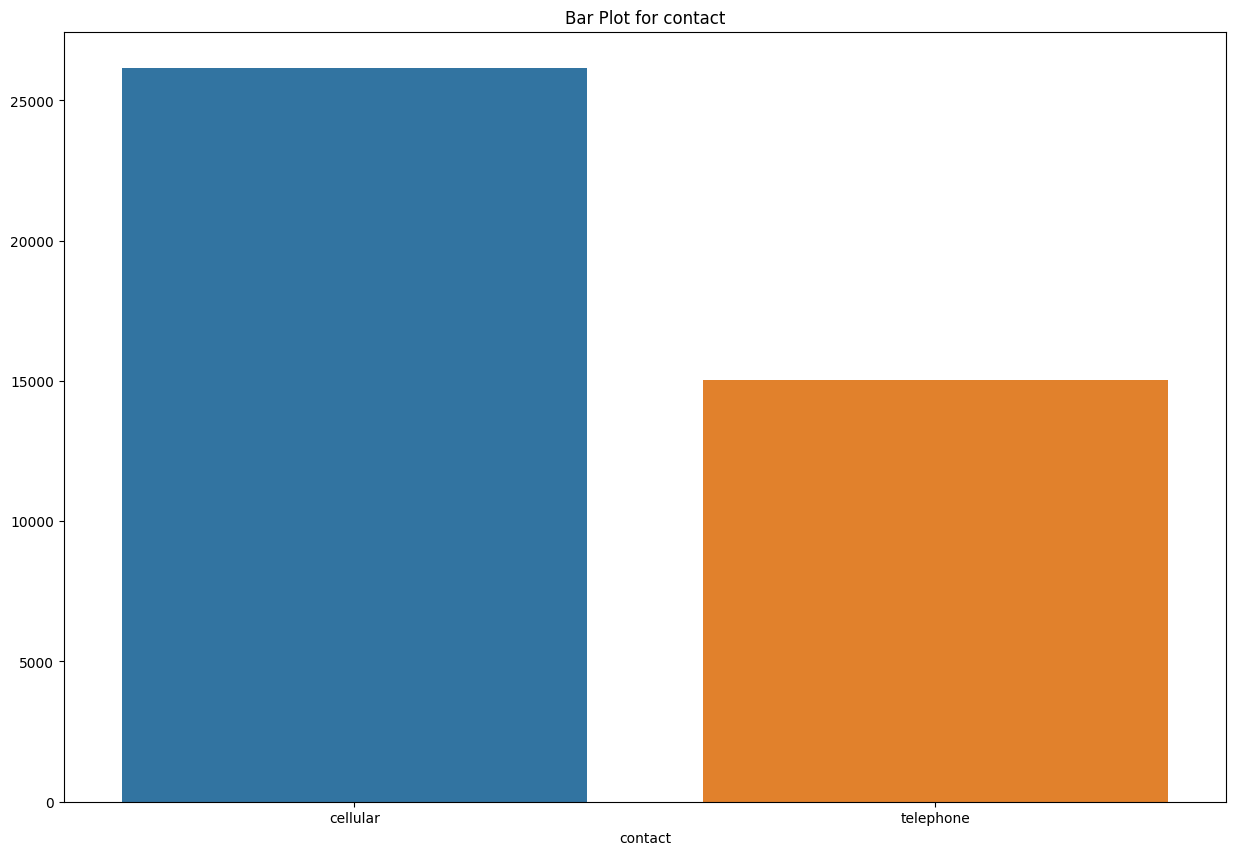

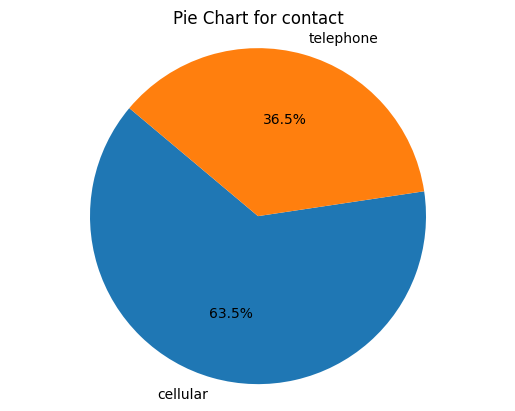

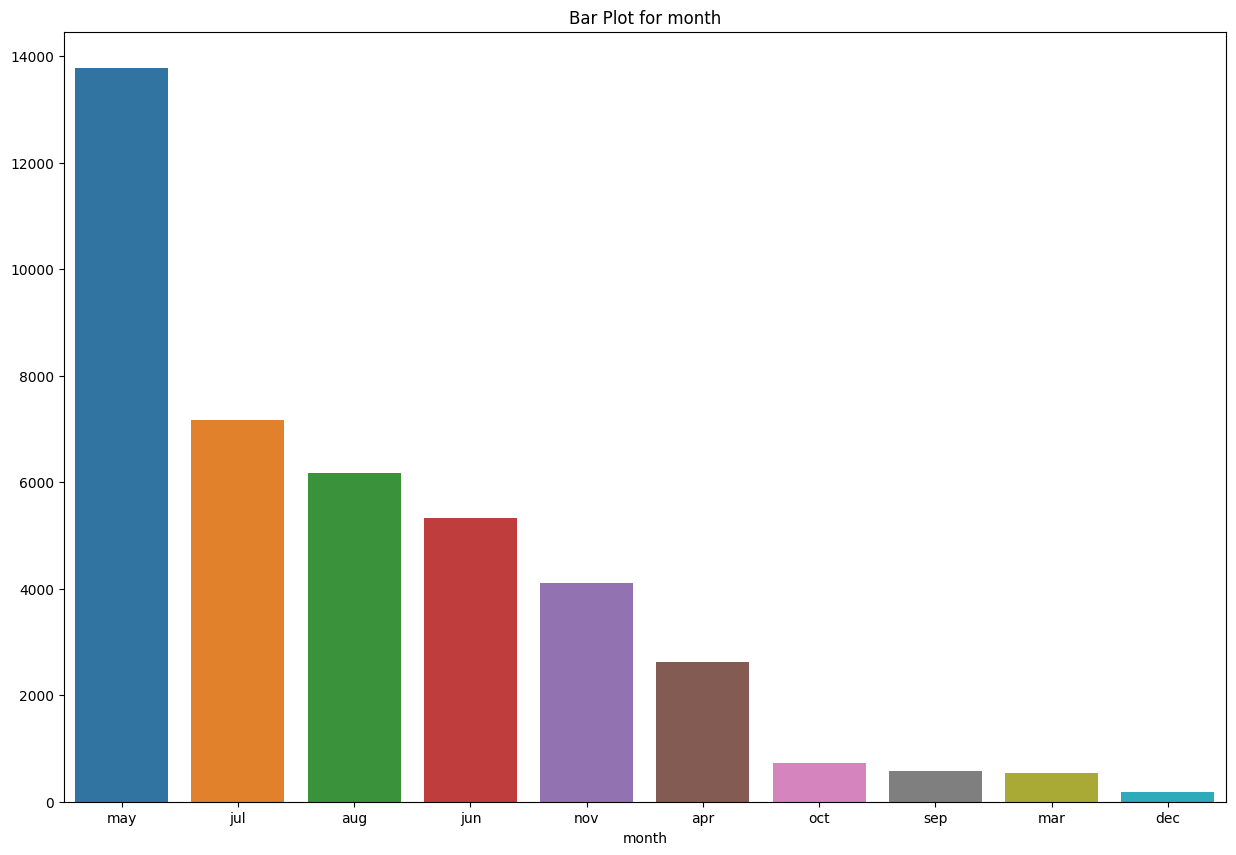

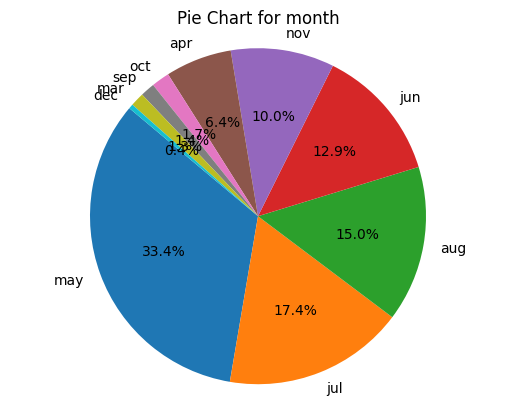

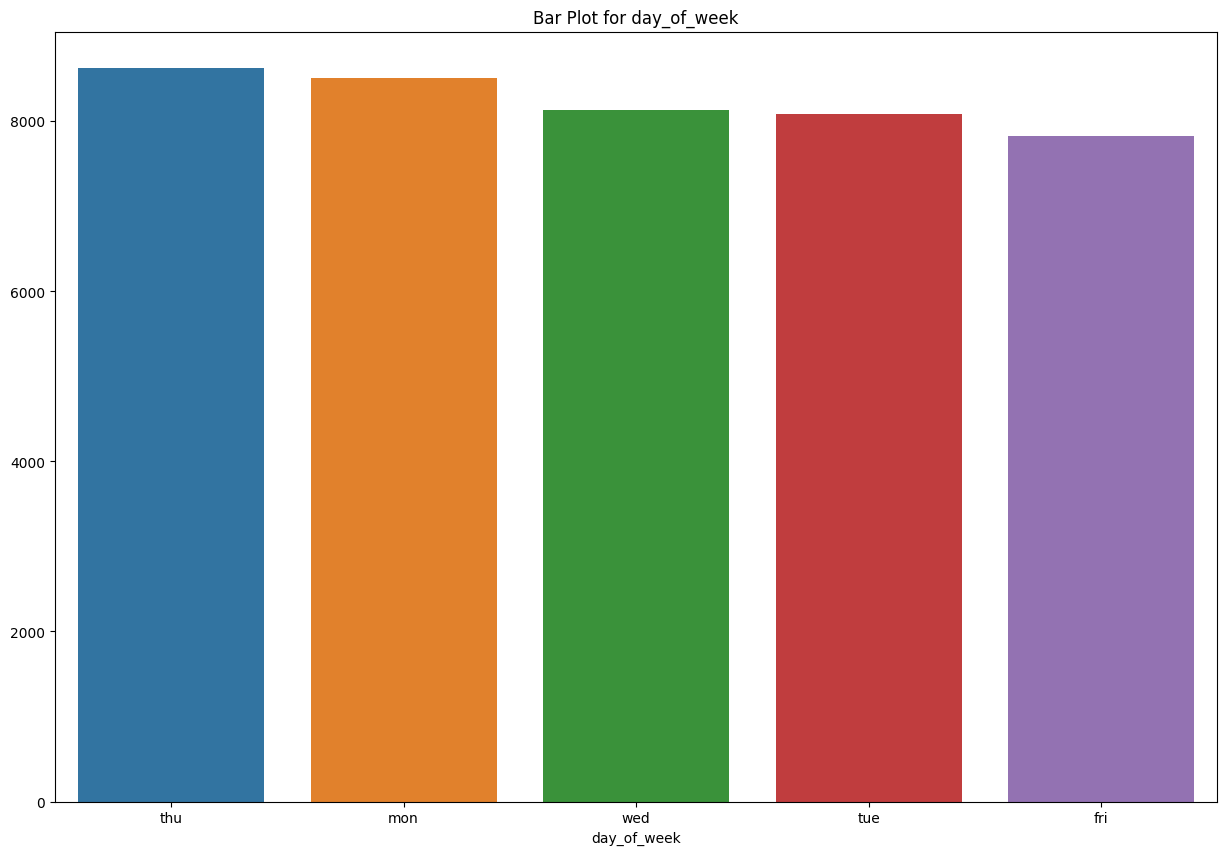

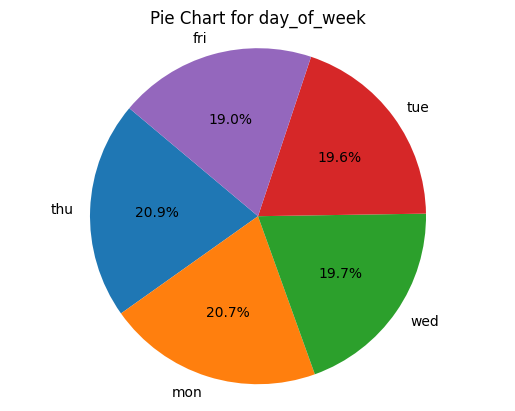

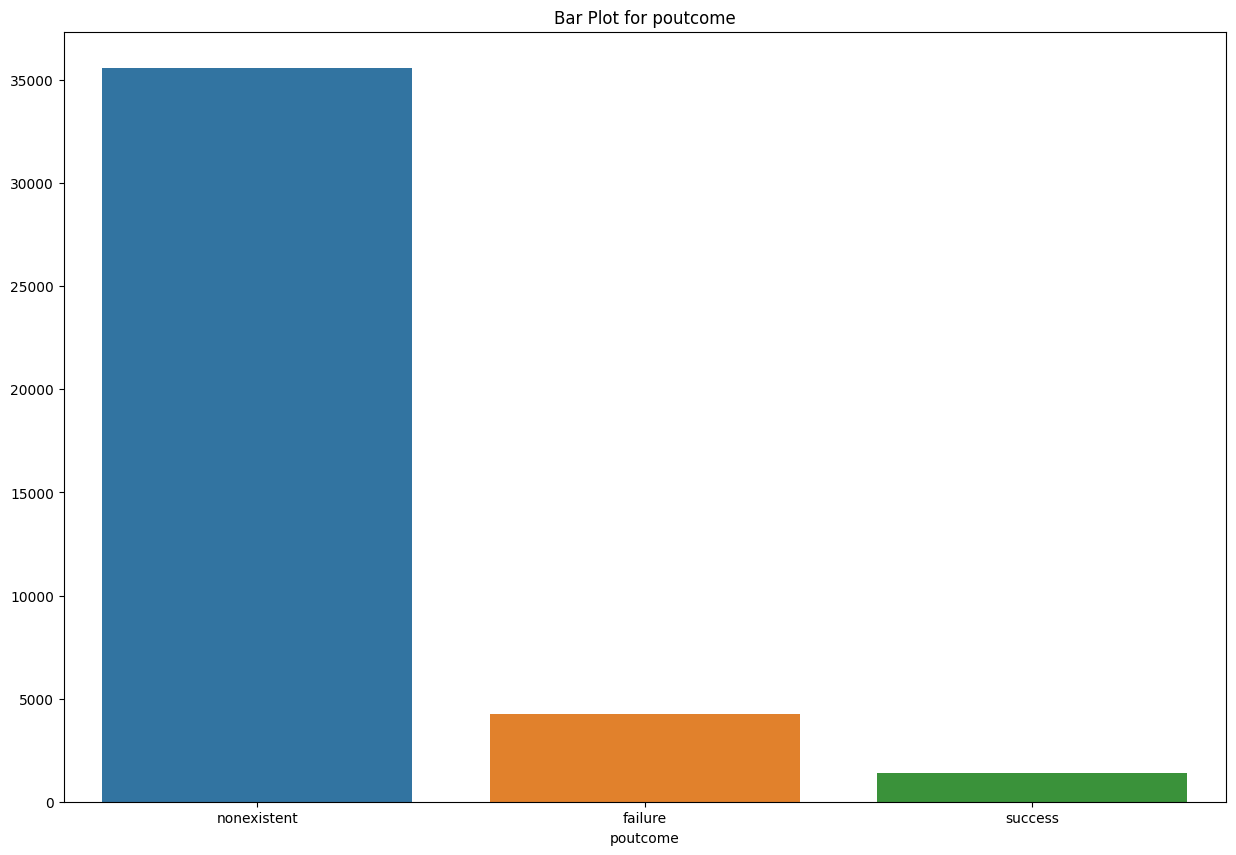

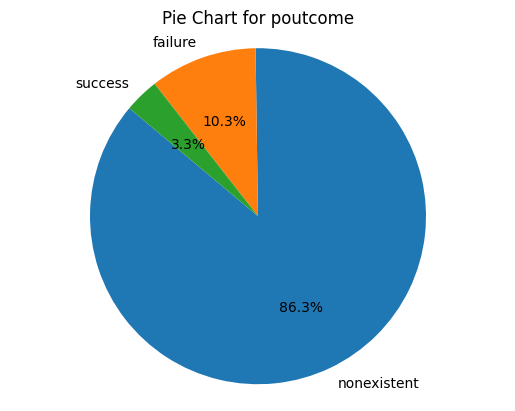

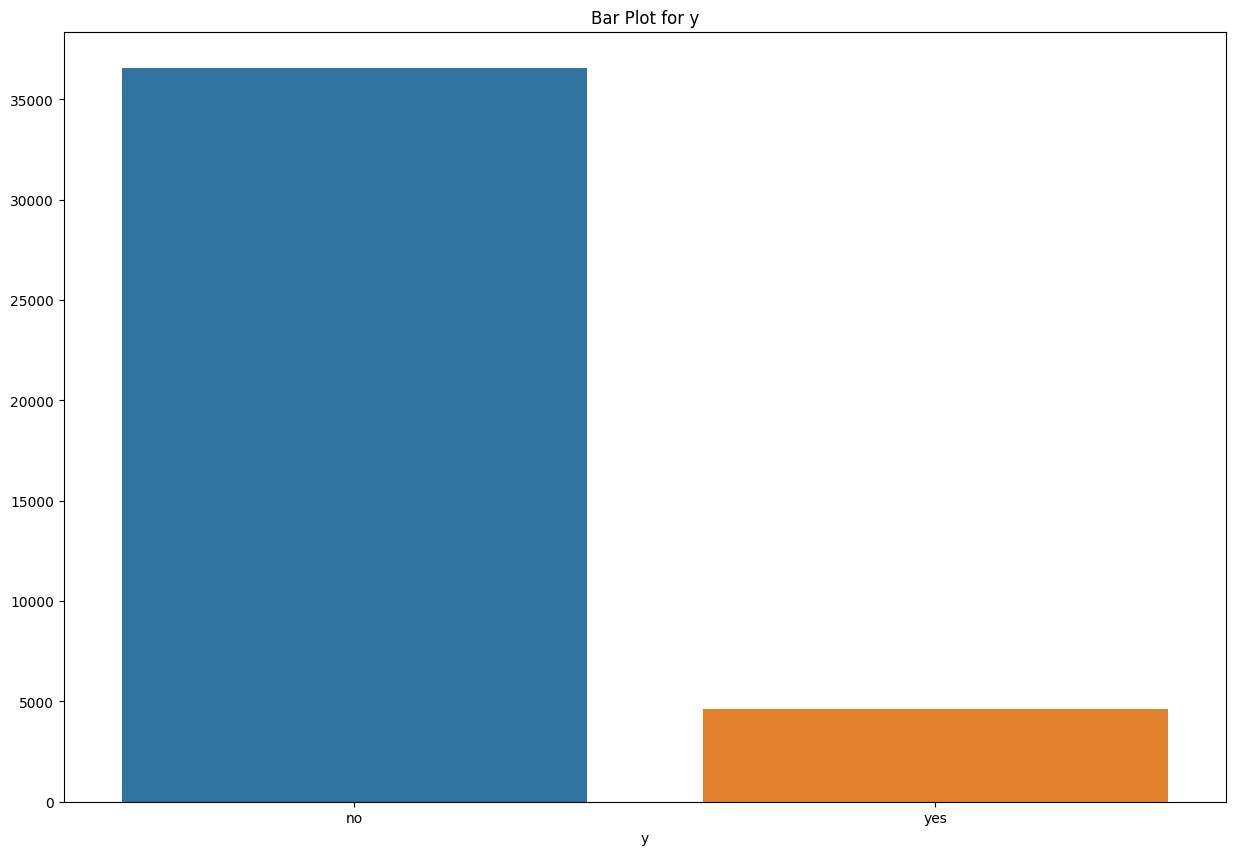

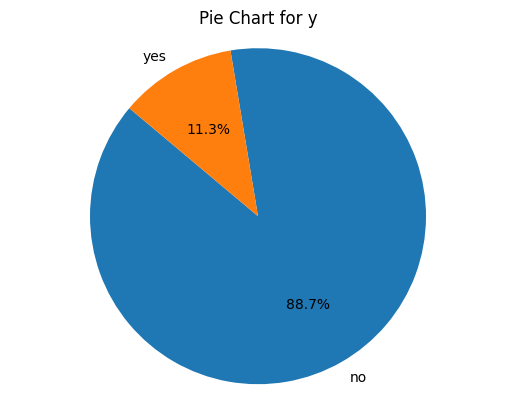

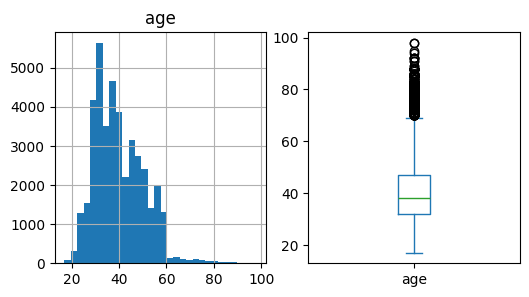

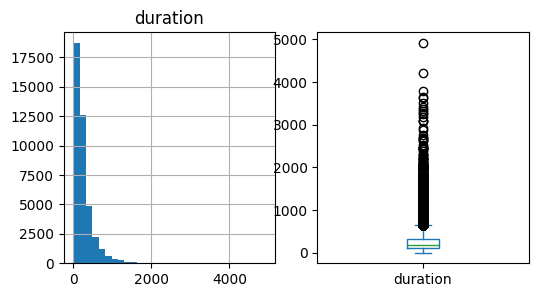

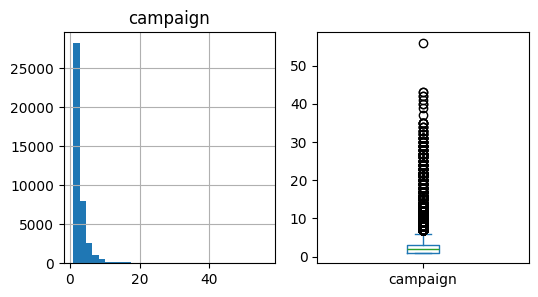

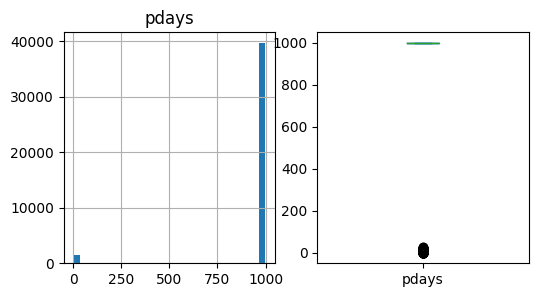

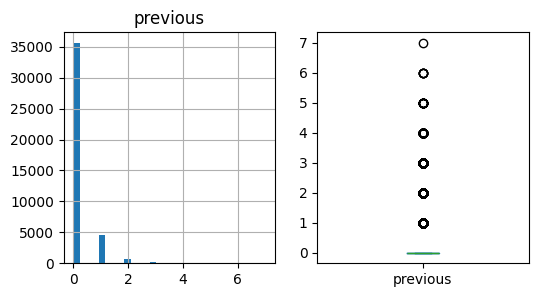

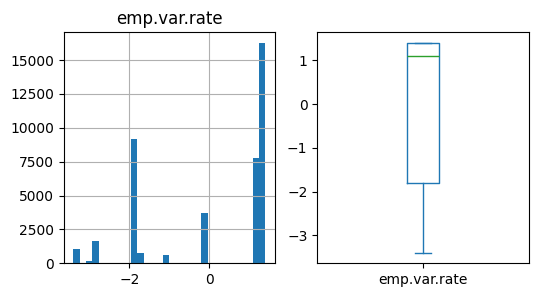

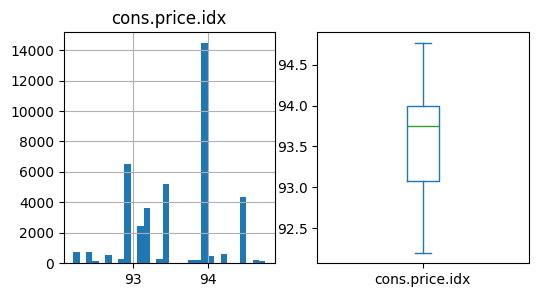

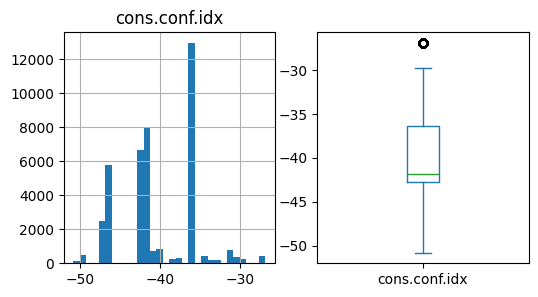

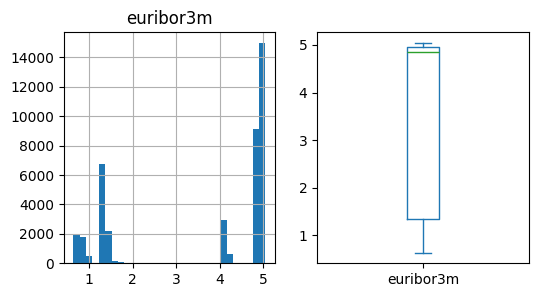

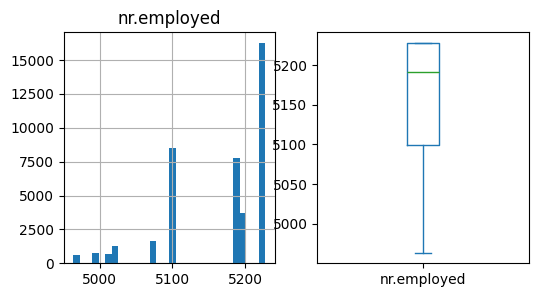

In [24]:
# Separate numerical and categorical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = df.select_dtypes(include=['object', 'bool']).columns

# Plot Barplot & Pieplot for categorical columns
for col in categorical_cols:
    plt.figure(figsize=(15, 10))
    xzx = df[col].value_counts()
    sns.barplot(x=xzx.index,y=xzx.values)
    plt.title(f'Bar Plot for {col}')
    plt.show()

    plt.pie(xzx, labels=xzx.index, autopct='%1.1f%%', startangle=140)
    plt.axis('equal')
    plt.title(f'Pie Chart for {col}')
    plt.show()

# Plot histograms & box plots for numerical columns
for col in numerical_cols:
    plt.figure(figsize=(6, 3))
    
    # Histogram
    plt.subplot(1, 2, 1)
    df[col].hist(bins=30)
    plt.title(col)
    
    # Box plot
    plt.subplot(1, 2, 2)
    df[col].plot(kind='box')  
    plt.show()

In [25]:
#Remove Unwanted Features
df.drop(columns=['day_of_week'], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   duration        41188 non-null  int64  
 10  campaign        41188 non-null  int64  
 11  pdays           41188 non-null  int64  
 12  previous        41188 non-null  int64  
 13  poutcome        41188 non-null  object 
 14  emp.var.rate    41188 non-null  float64
 15  cons.price.idx  41188 non-null  float64
 16  cons.conf.idx   41188 non-null  float64
 17  euribor3m       41188 non-null 

# 3: Data Preprocessing


In [26]:
# Apply one-hot encoding to 'job', 'marital', and 'contact'
df = pd.get_dummies(df, columns=['job', 'marital', 'contact'], drop_first=True)

# Define mapping for ordinal encoding
ordinal_mapping = {
    'education': {'basic.4y': -1, 'basic.6y': -1, 'basic.9y': -1, 'high.school': 1,
                  'illiterate': -2, 'professional.course': 1, 'university.degree': 2, 'unknown': 0},
    'month': {'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4, 'may': 5, 'jun': 6,
              'jul': 7, 'aug': 8, 'sep': 9, 'oct': 10, 'nov': 11, 'dec': 12},
    'poutcome': {'failure': -1, 'nonexistent': 0, 'success': 1},
    'default': {'no': -1, 'yes': 1, 'unknown': 0},
    'housing': {'no': -1, 'yes': 1, 'unknown': 0},
    'loan': {'no': -1, 'yes': 1, 'unknown': 0}
}

# Apply ordinal encoding
for column, mapping in ordinal_mapping.items():
    df[column] = df[column].map(mapping)

# Apply binary encoding for the 'y' column (output variable)
df['y'] = df['y'].map({'no': 0, 'yes': 1})

df

,age,education,default,housing,loan,month,duration,campaign,pdays,previous,...,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,marital_unknown,contact_telephone
0,56,-1,-1,-1,-1,5,261,1,999,0,...,False,False,False,False,False,False,True,False,False,True
1,57,1,0,-1,-1,5,149,1,999,0,...,False,True,False,False,False,False,True,False,False,True
2,37,1,-1,1,-1,5,226,1,999,0,...,False,True,False,False,False,False,True,False,False,True
3,40,-1,-1,-1,-1,5,151,1,999,0,...,False,False,False,False,False,False,True,False,False,True
4,56,1,-1,-1,1,5,307,1,999,0,...,False,True,False,False,False,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,1,-1,1,-1,11,334,1,999,0,...,False,False,False,False,False,False,True,False,False,False
41184,46,1,-1,-1,-1,11,383,1,999,0,...,False,False,False,False,False,False,True,False,False,False
41185,56,2,-1,1,-1,11,189,2,999,0,...,False,False,False,False,False,False,True,False,False,False
41186,44,1,-1,-1,-1,11,442,1,999,0,...,False,False,False,True,False,False,True,False,False,False


In [30]:
df.describe()

,age,education,default,housing,loan,month,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,0.644484,-0.791128,0.071720,-0.672575,6.607896,258.285010,2.567593,962.475454,0.172963,-0.069899,0.081886,93.575664,-40.502600,3.621291,5167.035911,0.112654
std,10.42125,1.195925,0.406686,0.985314,0.723616,2.040998,259.279249,2.770014,186.910907,0.494901,0.362886,1.570960,0.578840,4.628198,1.734447,72.251528,0.316173
min,17.00000,-2.000000,-1.000000,-1.000000,-1.000000,3.000000,0.000000,1.000000,0.000000,0.000000,-1.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000
25%,32.00000,-1.000000,-1.000000,-1.000000,-1.000000,5.000000,102.000000,1.000000,999.000000,0.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,0.000000
50%,38.00000,1.000000,-1.000000,1.000000,-1.000000,6.000000,180.000000,2.000000,999.000000,0.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,0.000000
75%,47.00000,2.000000,-1.000000,1.000000,-1.000000,8.000000,319.000000,3.000000,999.000000,0.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.000000
max,98.00000,2.000000,1.000000,1.000000,1.000000,12.000000,4918.000000,56.000000,999.000000,7.000000,1.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,1.000000


<Axes: >

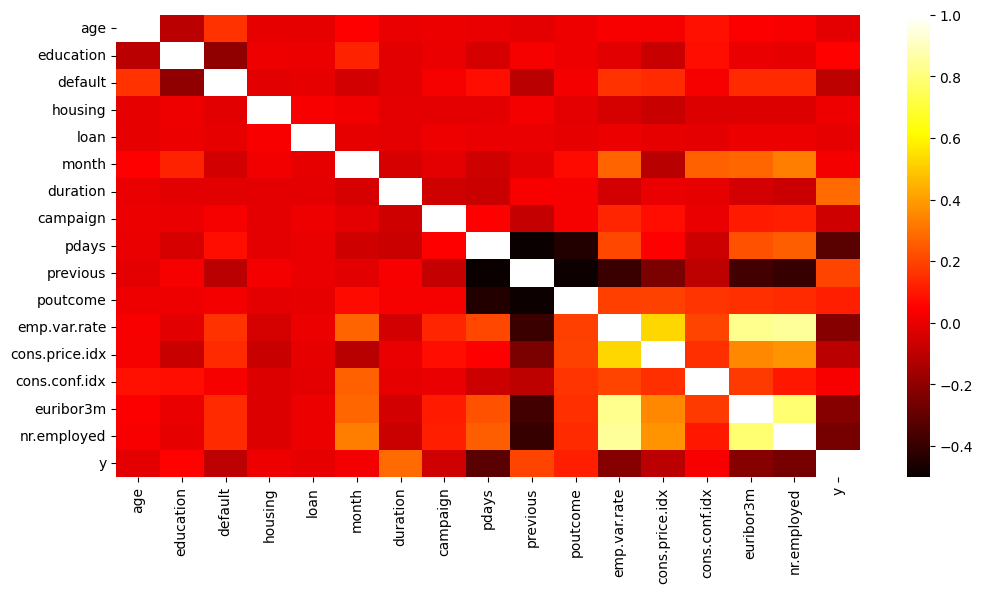

In [44]:
# Calculate correlations
numeric_columns = df.select_dtypes(include=['number'])
corr = numeric_columns.corr(method='kendall')
fig = plt.figure(figsize=(12, 6))
sns.heatmap(corr,cmap='hot')

In [47]:
# Initialize the MinMaxScaler

scaler = MinMaxScaler()
df[df.columns] = scaler.fit_transform(df[df.columns])

# Display the preprocessed DataFrame
df.head()

,age,education,default,housing,loan,month,duration,campaign,pdays,previous,...,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,marital_unknown,contact_telephone
0,0.481481,0.25,0.0,0.0,0.0,0.222222,0.053070,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,0.493827,0.75,0.5,0.0,0.0,0.222222,0.030297,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,0.246914,0.75,0.0,1.0,0.0,0.222222,0.045954,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.283951,0.25,0.0,0.0,0.0,0.222222,0.030704,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,0.481481,0.75,0.0,0.0,1.0,0.222222,0.062424,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


# 4: Split Data into Training and Testing Sets

In [54]:
from sklearn.model_selection import train_test_split

X = df.drop('y', axis=1)  # Features
y = df['y']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=77)

# 5 : Build and Train the Neural Network Model

In [170]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

model = Sequential()
model.add(Dense(64, activation='relu', input_dim=X_train.shape[1]))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=77, batch_size=63, validation_data=(X_test, y_test))

Epoch 1/77
524/524 [==============================] - 2s 2ms/step - loss: 0.3164 - accuracy: 0.8844 - val_loss: 0.2663 - val_accuracy: 0.9001
Epoch 2/77
524/524 [==============================] - 1s 2ms/step - loss: 0.2657 - accuracy: 0.8997 - val_loss: 0.2320 - val_accuracy: 0.9016
Epoch 3/77
524/524 [==============================] - 2s 3ms/step - loss: 0.2355 - accuracy: 0.9030 - val_loss: 0.2116 - val_accuracy: 0.9080
Epoch 4/77
524/524 [==============================] - 2s 4ms/step - loss: 0.2189 - accuracy: 0.9064 - val_loss: 0.2011 - val_accuracy: 0.9076
Epoch 5/77
524/524 [==============================] - 2s 4ms/step - loss: 0.2116 - accuracy: 0.9073 - val_loss: 0.1990 - val_accuracy: 0.9090
Epoch 6/77
524/524 [==============================] - 2s 4ms/step - loss: 0.2086 - accuracy: 0.9094 - val_loss: 0.1961 - val_accuracy: 0.9092
Epoch 7/77
524/524 [==============================] - 2s 4ms/step - loss: 0.2036 - accuracy: 0.9096 - val_loss: 0.1955 - val_accuracy: 0.9107
Epoch 

# 6 : Evaluate the Model

In [171]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

258/258 [==============================] - 0s 1ms/step - loss: 0.1827 - accuracy: 0.9136
Test Accuracy: 91.36%


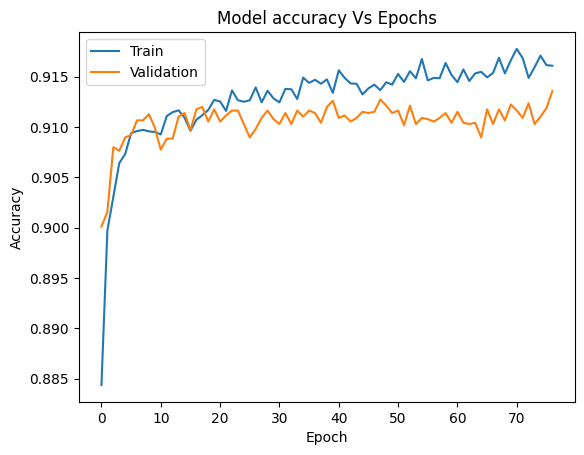

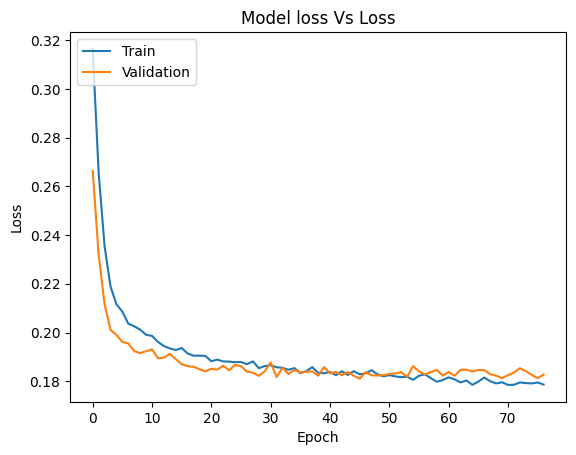

In [172]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy Vs Epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss Vs Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [173]:
y_pred = model.predict(X_test)

258/258 [==============================] - 0s 1ms/step


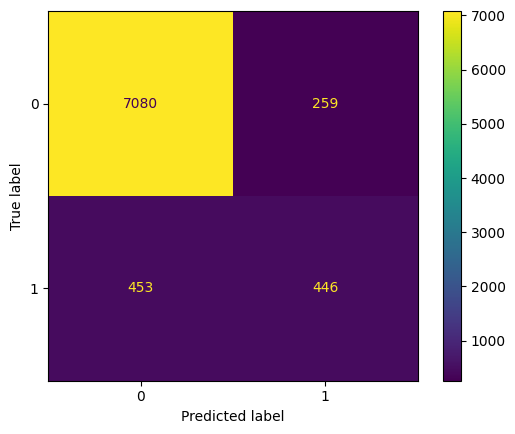

In [174]:
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred>0.5)).plot()